In [22]:
from ultralytics import YOLO
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image
import cv2
import numpy as np
import matplotlib.pyplot as plt
model = YOLO('PROJECT/categorical_162/weights/best.pt')

In [23]:
img = cv2.imread("categorical-cleared-augmented-clahe/test/wet/1328_png.rf.472274c8230a103eb44a4ae8a87b4dc5.jpg")
img = cv2.resize(img, (384  , 384))
rgb_img = img.copy()
img = np.float32(img) / 255
target_layers =[model.model.model[-2]]


0: 384x384 wet 0.96, dry 0.04, normal 0.00, 4.0ms
Speed: 2.0ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 384)


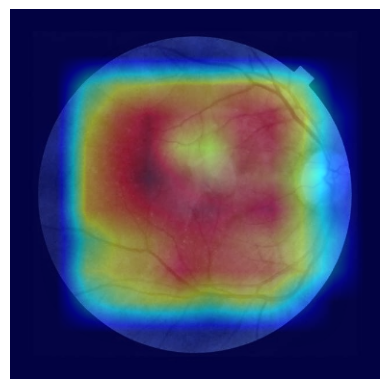

In [24]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.axis("off")
plt.show()